## Author: Christian Themin
## Starwars Movie Analysis with Python


This project examines Starwars movie data by performing the first steps of the data science process, including data cleansing and exploration.

The file contains the data behind America's Favorite Star Wars Movies (and Least Favorite Characters). The authors collected the data by running a poll through SurveyMonkey Audience, surveying 1,186 respondents.

The analysis will help to define interesting metrics in answering client's questions as follow:
1. How many people have seen the movie?
2. Which episode of the movie has the highest rank?
3. Which Starwars character is the most favorite?
4. What's the average income of people who watched the movie?
5. Explore people's Demographic towards the Starwars Character

## Data Extraction & Discovering

In [39]:
# Import the required library for analyis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Retrieve the data and rename the columns
filename = 'StarWars.csv'
starwars = pd.read_csv(filename, sep=',', decimal='.', skiprows=2,
                      names=['Resp ID', 'Have you seen the movie?', 'Are you a starwars fan?', 
                            'Seen starwars Ep1', 'Seen starwars Ep2','Seen starwars Ep3',
                            'Seen starwars Ep4', 'Seen starwars Ep5', 'Seen starwars Ep6',
                            'Rank starwars Ep1', 'Rank starwars Ep2', 'Rank starwars Ep3', 
                            'Rank starwars Ep4', 'Rank starwars Ep5', 'Rank starwars Ep6', 
                            'Han', 'Luke', 'Princess', 'Anakin', 'Obi', 'Emperor', 'Darth',
                            'Lando', 'Boba', 'C3P0', 'R2D2', 'Jar', 'Padme', 'Yoda',
                            'Which character shot first?', 'Are you familiar with EU?', 'Are you a fan of EU?',
                            'Are you a fan of startrek?', 'Gender', 'Age', 'Income', 'Education', 'Location'])

In [41]:
# Check the first few rows of the data
starwars.head()

,Resp ID,Have you seen the movie?,Are you a starwars fan?,Seen starwars Ep1,Seen starwars Ep2,Seen starwars Ep3,Seen starwars Ep4,Seen starwars Ep5,Seen starwars Ep6,Rank starwars Ep1,...,Yoda,Which character shot first?,Are you familiar with EU?,Are you a fan of EU?,Are you a fan of startrek?,Gender,Age,Income,Education,Location
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [42]:
# Perform descriptive analysis
starwars.describe()

,Resp ID,Rank starwars Ep1,Rank starwars Ep2,Rank starwars Ep3,Rank starwars Ep4,Rank starwars Ep5,Rank starwars Ep6
count,1.186000e+03,835.000000,836.000000,835.000000,836.000000,836.000000,836.000000
mean,3.290128e+09,3.732934,4.087321,4.341317,3.272727,2.513158,3.047847
std,1.055639e+06,1.656122,1.365365,1.400464,1.825901,1.578620,1.666897
min,3.288373e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.289451e+09,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,3.290147e+09,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,3.290814e+09,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,3.292880e+09,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [43]:
# Check the data types
starwars.dtypes

Resp ID                          int64
Have you seen the movie?        object
Are you a starwars fan?         object
Seen starwars Ep1               object
Seen starwars Ep2               object
Seen starwars Ep3               object
Seen starwars Ep4               object
Seen starwars Ep5               object
Seen starwars Ep6               object
Rank starwars Ep1              float64
Rank starwars Ep2              float64
Rank starwars Ep3              float64
Rank starwars Ep4              float64
Rank starwars Ep5              float64
Rank starwars Ep6              float64
Han                             object
Luke                            object
Princess                        object
Anakin                          object
Obi                             object
Emperor                         object
Darth                           object
Lando                           object
Boba                            object
C3P0                            object
R2D2                     

## Data Cleaning & Exploration

### 1. Explore the variable "Have you seen the movie?".

In [44]:
# Check the data
starwars['Have you seen the movie?'].value_counts(dropna=False)

Yes     935
No      250
Yes       1
Name: Have you seen the movie?, dtype: int64

In [45]:
# Remove the extra-white space
starwars['Have you seen the movie?'] = starwars['Have you seen the movie?'].str.strip()

In [46]:
# Recheck the value
starwars['Have you seen the movie?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen the movie?, dtype: int64

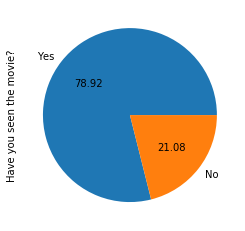

In [47]:
# Plot the data
starwars['Have you seen the movie?'].value_counts().plot(kind='pie', autopct = '%.2f')
plt.show()

78.92% of the participants have seen the movie.<br>
21.08% of the participants have not seen the movie.

## 2. Explore the variable "Are you a starwars fan?".

In [48]:
# Check the data
starwars['Are you a starwars fan?'].value_counts(dropna=False)

Yes     551
NaN     350
No      283
Noo       1
Yess      1
Name: Are you a starwars fan?, dtype: int64

In [49]:
# Replace the invalid value to the correct one
starwars['Are you a starwars fan?'].replace('Yess', 'Yes', inplace=True)
starwars['Are you a starwars fan?'].replace('Noo', 'No', inplace=True)
starwars['Are you a starwars fan?'].fillna(value = 'No answer', inplace=True)

In [50]:
# Recheck the data
starwars['Are you a starwars fan?'].value_counts(dropna=False)

Yes          552
No answer    350
No           284
Name: Are you a starwars fan?, dtype: int64

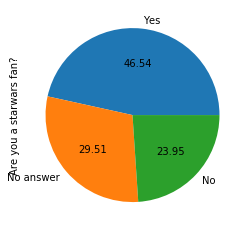

In [51]:
# Plot the data
starwars['Are you a starwars fan?'].value_counts().plot(kind='pie', autopct='%.02f')
plt.show()

46.54% of the participants are Starwars fans.<br>
23.95% of the participants are not Starwars fans.<br>
29.51% of the participants did not answer.

## 3. Explore the variable "Seen starwars Ep1" to "Seen starwars Ep6".

These variables are boolean type of data, thus, we can set the value to 0 for not seen and 1 for seen.

In [52]:
# Set 0 and 1 value on the seen starwars Ep 1 to 6
starwars.loc[:,'Seen starwars Ep1':'Seen starwars Ep6'] = np.where(starwars.loc[:, 'Seen starwars Ep1':'Seen starwars Ep6'].isnull(), 0, 1)

In [53]:
# Group the data into a new variable
seen_movies = starwars.loc[:, 'Seen starwars Ep1':'Seen starwars Ep6']

In [54]:
seen_movies.head()

,Seen starwars Ep1,Seen starwars Ep2,Seen starwars Ep3,Seen starwars Ep4,Seen starwars Ep5,Seen starwars Ep6
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,1,1,1,0,0,0
3,1,1,1,1,1,1
4,1,1,1,1,1,1


In [55]:
# Summarise the total of the value
seen_movies.sum()

Seen starwars Ep1    673
Seen starwars Ep2    571
Seen starwars Ep3    550
Seen starwars Ep4    607
Seen starwars Ep5    758
Seen starwars Ep6    738
dtype: int64

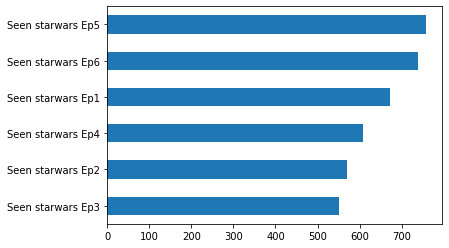

In [56]:
# Plot the data
seen_movies.sum().sort_values().plot(kind='barh')
plt.show()

The result of our survey shows that Starwars Episode 5 is the most seen movie compared to the other Starwars episodes.

## 4. Explore the variables of Movie ranking fom Ep 1 to Ep 6.

In [57]:
# Group the variables into one
group_rank = starwars.loc[:,'Rank starwars Ep1':'Rank starwars Ep6']

In [58]:
# Discover the average value of each variable
group_rank.mean()

Rank starwars Ep1    3.732934
Rank starwars Ep2    4.087321
Rank starwars Ep3    4.341317
Rank starwars Ep4    3.272727
Rank starwars Ep5    2.513158
Rank starwars Ep6    3.047847
dtype: float64

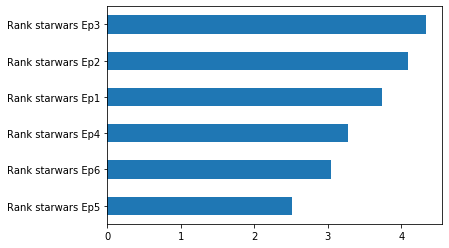

In [59]:
# Plot the value
group_rank.mean().sort_values().plot(kind='barh')
plt.show()

Starwars Episode 3 has the highest rank compared to the other Starwars episodes.

## 5. Explore the variables of all Starwars Characters.

In [60]:
# Check the data
starwars['Han'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han, dtype: int64

#### From the result above, we can determine that the value of this variable is an ordinal type of data, we need to reassign the value to numeric for further analysis.

In [61]:
# Apply new values to the variable according to the rating
mask_character = {'Very favorably': 5,
                  'Somewhat favorably': 4,
                  'Neither favorably nor unfavorably (neutral)': 3,
                  'Somewhat unfavorably': 2,
                  'Very unfavorably': 1,
                  'Unfamiliar': 0
                 }

In [62]:
# Get the index number by column
starwars.columns.get_loc('Han')

15

In [63]:
# Get the index number by column
starwars.columns.get_loc('Yoda')

28

In [64]:
# Apply the mask range from 15:29, index no 29 will not be masked, iloc rules
for i in list(range(15,29)):
    starwars.iloc[:, i] = starwars.iloc[:, i].map(mask_character)

In [65]:
# Recheck the data
starwars['Han'].value_counts(dropna=False)

5.0    610
NaN    372
4.0    151
3.0     44
2.0      8
1.0      1
Name: Han, dtype: int64

In [66]:
starwars['Yoda'].value_counts(dropna=False)

5.0    605
NaN    370
4.0    144
3.0     51
2.0      8
1.0      8
Name: Yoda, dtype: int64

In [67]:
# Group the data for further analysis
group_char = starwars.loc[:, 'Han':'Yoda']

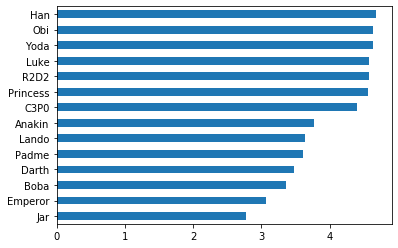

In [68]:
# Plot the data
group_char.mean().sort_values().plot(kind='barh')
plt.show()

Han is the most favorite character amongst all other Starwars characters.

## 6. Explore the variable of "Which character shot first?".

In [69]:
# Check the value of the variable
starwars['Which character shot first?'].value_counts(dropna=False)

NaN                                 358
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

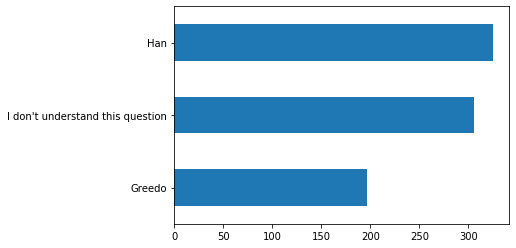

In [70]:
# Plot the data
starwars['Which character shot first?'].value_counts().sort_values().plot(kind='barh')
plt.show()

## 7. Explore the variables of:
"Are you familiar with the Expanded Universe (EU)?" <br>
"Are you a fan of EU?"<br>
"Are you a fan of startrek?"<br>

In [71]:
# Check the value of the variable
starwars['Are you familiar with EU?'].value_counts(dropna=False)

No     615
NaN    358
Yes    213
Name: Are you familiar with EU?, dtype: int64

In [72]:
# Check the value of the variable
starwars['Are you a fan of EU?'].value_counts(dropna=False)

NaN     973
No      114
Yes      98
Yess      1
Name: Are you a fan of EU?, dtype: int64

In [73]:
# Replace the typo value
starwars['Are you a fan of EU?'].replace('Yess', 'Yes', inplace=True)

In [74]:
# Check the value of the variable
starwars['Are you a fan of startrek?'].value_counts(dropna=False)

No     639
Yes    426
NaN    118
yes      1
Noo      1
no       1
Name: Are you a fan of startrek?, dtype: int64

In [75]:
# Replace the typo value
starwars['Are you a fan of startrek?'].replace('no ', 'No', inplace=True)
starwars['Are you a fan of startrek?'].replace('Noo', 'No', inplace=True)
starwars['Are you a fan of startrek?'].replace('yes', 'Yes', inplace=True)

### Create dataframes for each value_counts variable

In [76]:
familiar_EU = starwars['Are you familiar with EU?'].value_counts().to_frame('Familiar with EU').transpose()
familiar_EU

,No,Yes
Familiar with EU,615,213


In [77]:
fan_EU = starwars['Are you a fan of EU?'].value_counts().to_frame('Fan of EU').transpose()
fan_startrek = starwars['Are you a fan of startrek?'].value_counts().to_frame('Fan of Startrek').transpose()

In [78]:
# To change the axis name, use this code
#fan_startrek = starwars['Are you a fan of startrek?'].value_counts().rename_axis('Fan_of_Startrek').to_frame('counts').transpose()
#fan_startrek

In [416]:
merged_EU_startrek = pd.concat([familiar_EU, fan_EU, fan_startrek], axis=0)
merged_EU_startrek

,No,Yes
Familiar with EU,615,213
Fan of EU,114,99
Fan of Startrek,641,427


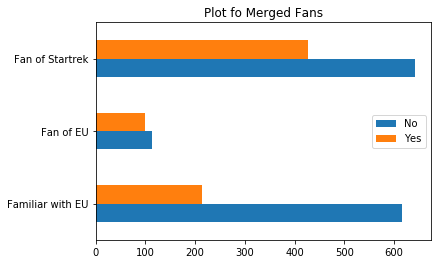

In [417]:
# Plot of merged fans
merged_EU_startrek.plot(kind='barh')
plt.title("Plot fo Merged Fans")
plt.show()

## 8. Explore the variables of:
Gender, Age, Income, and Education

#### Gender

In [98]:
# Check the value of gender
starwars['Gender'].value_counts(dropna=False)

Female    546
Male      496
NaN       140
female      2
male        1
F           1
Name: Gender, dtype: int64

In [99]:
# Replace the typo values to the correct ones
starwars['Gender'].replace('female', 'Female', inplace = True)
starwars['Gender'].replace('male', 'Male', inplace = True)
starwars['Gender'].replace('F', 'Female', inplace = True)

In [418]:
# Group the gender count into a variable
gender_count = starwars['Gender'].value_counts()
gender_count

Female    549
Male      497
Name: Gender, dtype: int64

#### Age

In [173]:
# Check the value of age
starwars['Age'].value_counts(dropna=False)

45-60    292
> 60     269
30-44    268
18-29    217
NaN      140
Name: Age, dtype: int64

In [174]:
# Replace the typo values to the correct ones
starwars['Age'].replace('500', '45-60', inplace=True)

In [248]:
# Group the gender count into a variable
age_count = starwars['Age'].value_counts()
age_count

45-60    292
> 60     269
30-44    268
18-29    217
Name: Age, dtype: int64

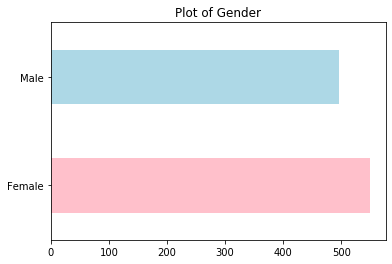

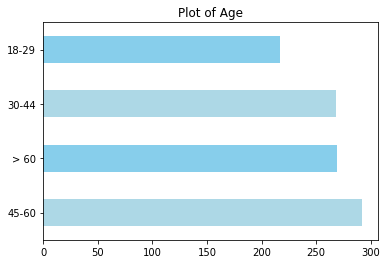

In [419]:
# Plot of Gender and Age
gender_count.plot(kind='barh', color=['pink','lightblue'])
plt.title("Plot of Gender")
plt.show()

age_count.plot(kind='barh', color=('lightblue', 'skyblue'))
plt.title("Plot of Age")
plt.show()

#### Income

In [265]:
# Check the value of income
starwars['Income'].value_counts(dropna=False)

NaN                    328
$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Income, dtype: int64

In [266]:
# Group the income count into a variable
income_count = starwars['Income'].value_counts()
income_count

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Income, dtype: int64

#### Education

In [270]:
# Check the value of Education
starwars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [272]:
# Group the education count into a variable
education_count = starwars['Education'].value_counts()
education_count

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

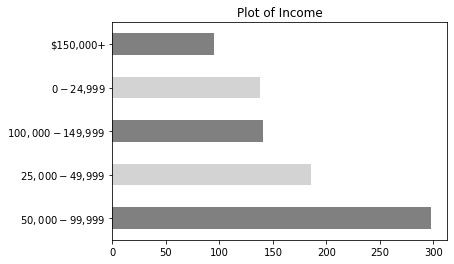

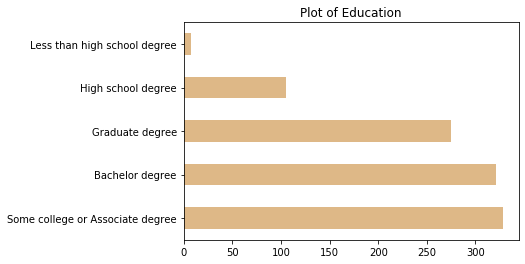

In [399]:
# Plot of Income and Education
income_count.plot(kind='barh', color=('gray', 'lightgray'))
plt.title("Plot of Income")
plt.show()

education_count.plot(kind='barh', color=['burlywood'])
plt.title("Plot of Education")
plt.show()

## 9. Explore the variable of Location

In [420]:
# Check the value of the data
starwars['Location'].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location, dtype: int64

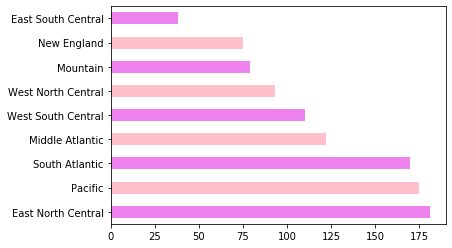

In [421]:
# Plot the location
starwars['Location'].value_counts().plot(kind='barh', color=['violet', 'pink'])
plt.show()

## Discover relationship between variables

### Explore the relationship between being a Starwars fan and Gender

In [422]:
# Map the Starwars fan and not fan as 0 and 1
mask_fan_or_not = {'Yes': 1, 'No':0}
starwars['Are you a starwars fan?'] = starwars['Are you a starwars fan?'].map(mask_fan_or_not)

In [423]:
starwars['Are you a starwars fan?'].value_counts()

1.0    552
0.0    284
Name: Are you a starwars fan?, dtype: int64

In [425]:
# Mask for gender
mask_female = starwars['Gender'] == 'Female'
mask_male = starwars['Gender'] == 'Male'

In [426]:
# Value counts for each gender
gender_count = starwars['Gender'].value_counts()

In [427]:
# Select the fan that is male
male_fan = starwars.loc[mask_male, 'Are you a starwars fan?'].value_counts()
# Select the fan that is female
female_fan = starwars.loc[mask_female, 'Are you a starwars fan?'].value_counts()

In [428]:
# For every male fan of gender count as Male, For every female fan of gender count as female
rate = [male_fan[1]/float(gender_count['Male']), female_fan[1]/float(gender_count['Female'])]

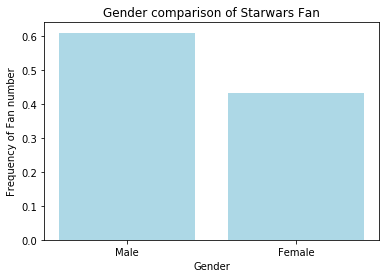

In [429]:
plt.bar(list(range(2)), rate, color='lightblue')
plt.xticks(list(range(2)), ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Frequency of Fan number')
plt.title('Gender comparison of Starwars Fan')
plt.show()

In [430]:
# Percentage of Male Starwars Fan
male_fan[1]/float(gender_count['Male'])*100

60.96579476861167

In [431]:
# Percentage of Female Starwars Fan
female_fan[1]/float(gender_count['Female'])*100

43.35154826958106

## Explore the relationship between Seen the movie with Starwars Fan

In [432]:
starwars.columns

Index(['Resp ID', 'Have you seen the movie?', 'Are you a starwars fan?',
       'Seen starwars Ep1', 'Seen starwars Ep2', 'Seen starwars Ep3',
       'Seen starwars Ep4', 'Seen starwars Ep5', 'Seen starwars Ep6',
       'Rank starwars Ep1', 'Rank starwars Ep2', 'Rank starwars Ep3',
       'Rank starwars Ep4', 'Rank starwars Ep5', 'Rank starwars Ep6', 'Han',
       'Luke', 'Princess', 'Anakin', 'Obi', 'Emperor', 'Darth', 'Lando',
       'Boba', 'C3P0', 'R2D2', 'Jar', 'Padme', 'Yoda',
       'Which character shot first?', 'Are you familiar with EU?',
       'Are you a fan of EU?', 'Are you a fan of startrek?', 'Gender', 'Age',
       'Income', 'Education', 'Location'],
      dtype='object')

In [433]:
starwars['Have you seen the movie?'] = starwars['Have you seen the movie?'].map(mask_fan_or_not)

In [434]:
starwars['Have you seen the movie?'].value_counts()

1    936
0    250
Name: Have you seen the movie?, dtype: int64

In [435]:
# fan count
SW_fan_count = starwars['Are you a starwars fan?'].value_counts()
# Yes, I am a fan
I_am_a_fan = starwars['Are you a starwars fan?'] == 1
I_am_not_a_fan = starwars['Are you a starwars fan?'] == 0

In [436]:
I_am_a_fan.value_counts()

False    634
True     552
Name: Are you a starwars fan?, dtype: int64

In [437]:
# Drop na is important here, or the plot will be flat later
seen_fan = starwars.dropna().loc[I_am_a_fan, 'Have you seen the movie?'].value_counts()
seen_not_fan = starwars.dropna().loc[I_am_not_a_fan, 'Have you seen the movie?'].value_counts()

In [438]:
rate_2 = [seen_fan[1]/float(SW_fan_count[1]), seen_not_fan[1]/float(SW_fan_count[0])]

Text(0.5, 1.0, 'Seen the Movie and Fan of Starwars')

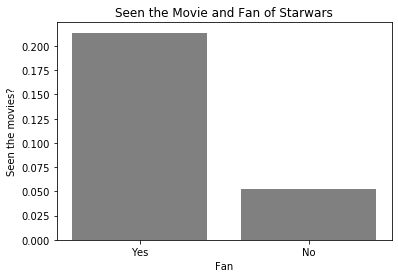

In [439]:
plt.bar(list(range(2)), rate_2, color='grey')
plt.xticks(list(range(2)), ['Yes', 'No'])
plt.xlabel('Fan')
plt.ylabel('Seen the movies?')
plt.title('Seen the Movie and Fan of Starwars')

In [440]:
# Percentage of seen movie and a Fan
seen_fan[1]/float(SW_fan_count[1])*100

21.3768115942029

In [441]:
# Percentage of seen movie but not a fan
seen_not_fan[1]/float(SW_fan_count[1])*100

2.717391304347826

## Explore the relationship between Familiar with Expanded Universe and A fan of EU

In [442]:
# Mapping the familiar or not into Boolean value
starwars['Are you familiar with EU?'] = starwars['Are you familiar with EU?'].map(mask_fan_or_not)

In [443]:
starwars['Are you familiar with EU?'].value_counts()

0.0    615
1.0    213
Name: Are you familiar with EU?, dtype: int64

In [444]:
# Select all fan and count the total
fan_count = starwars['Are you a fan of EU?'].value_counts()
# Group the fan
mask_fan = starwars['Are you a fan of EU?'] == 'Yes'
# Group the not fan
mask_not_fan = starwars['Are you a fan of EU?'] == 'No'

In [445]:
# Select the fan that is familiar with EU
fan_and_familiar = starwars.dropna().loc[mask_fan, 'Are you familiar with EU?'].value_counts()
# Select the not fan but is familiar with EU
not_fan_but_familiar = starwars.dropna().loc[mask_not_fan, 'Are you familiar with EU?'].value_counts()

In [446]:
rate_1 = [fan_and_familiar[1]/float(fan_count['Yes']), [not_fan_but_familiar[1]/float(fan_count['No'])]]

Text(0.5, 1.0, 'Familiar with EU and Fan of EU')

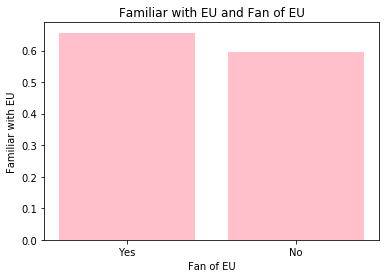

In [447]:
plt.bar(list(range(2)), rate_1, color='pink')
plt.xticks(list(range(2)), ['Yes', 'No'])
plt.xlabel('Fan of EU')
plt.ylabel('Familiar with EU')
plt.title('Familiar with EU and Fan of EU')

In [448]:
# Percentage of fan and familiar
fan_and_familiar[1]/float(fan_count['Yes'])*100

65.65656565656566

In [449]:
# Percentage of not fan but familiar
not_fan_but_familiar[1]/float(fan_count['No'])*100

59.64912280701754

## Explore people's Demographic towards Starwars Character

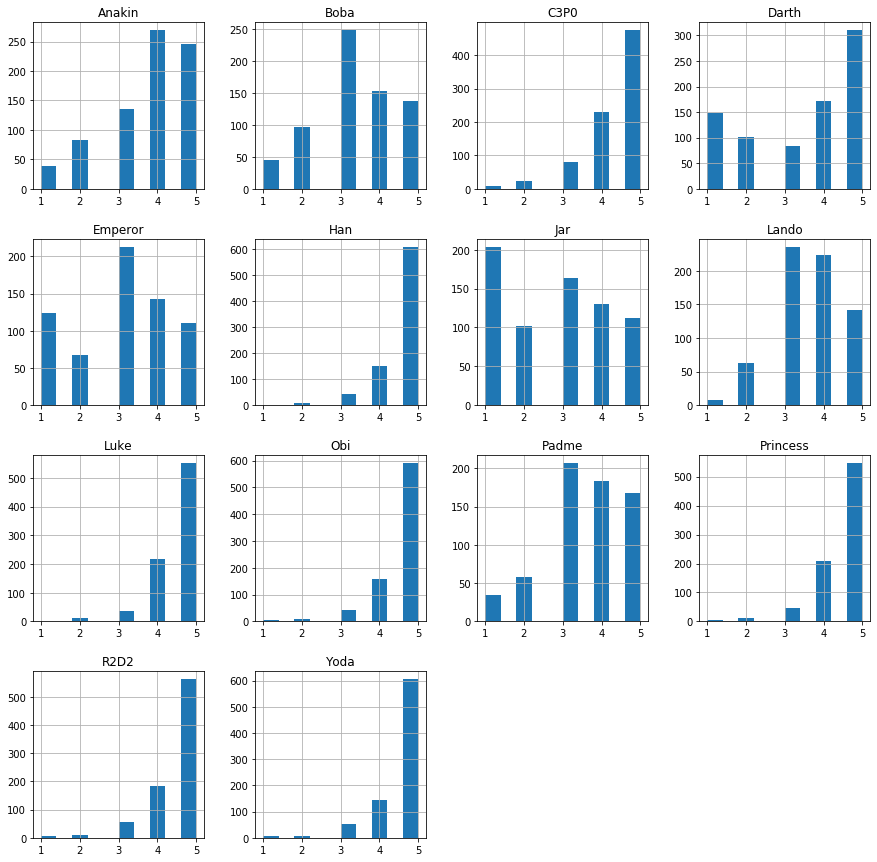

In [450]:
group_char.hist(figsize=(15,15))
plt.show()